## Answer generator for Job Applications

- Takes in resume and cover letter
- Will answer any question that is asked in the job applications.
- Will write the answer as you.

In [25]:
import os
from dotenv import load_dotenv
from datetime import datetime

from langchain_groq import ChatGroq

from typing_extensions import TypedDict
from typing import Optional, List, Annotated
from pydantic import BaseModel, Field

from langgraph.types import interrupt, Command
from langgraph.graph import StateGraph, START, END

from langgraph.checkpoint.memory import MemorySaver

from IPython.display import display, Markdown, Image

In [12]:
load_dotenv("../.env")

True

In [41]:
RESUME = """
Kuldeep Singh
 +1 (517)-297-4615 | singhku2@msu.edu | https://www.linkedin.com/in/kuldeep-singh-064a40118 | https://kuldeep7688.github.io/ | https://github.com/kuldeep7688 
EXPERIENCE
AI Engineer
 08/2024 - Present
BYO
 New York, NY
◦ Built RAG Agents using LangChain and Ollama with configurable word and topic guardrails, and tunable
contextual grounding and relevance scoring for controlled and accurate responses.
◦ Developed LLM instruction-tuning pipelines, with Dagster, AWS S3, SQS, DynamoDB and Torchserve.
◦ Implemented Continual Instruction Tuning methods based on SFT and PEFT techniques using Deepspeed
AI Consultant
 04/2024 - 08/2024
•
Department of Family Medicine, MSU
 East Lansing, MI
◦ Developed RAG agents using AWS Bedrock, OpenSearch, Titan embedding model and Claude Sonnet
with guardrails and advanced contextual grounding techniques to enhance response control and accuracy.
◦ Built LLM Workflows using LangGraph for information extraction.
◦ Developed a scalable ML model backend using FastAPI and Docker containers.
◦ Designed information extraction methods using OpenAI api, function calling and Pydantic data models.
AI Research Associate Intern
 06/2023 - 08/2023
•
JP Morgan & Chase
 New York City, NY
◦ Developed a financial question answering system using Large Language Models (LLMs), designed
negative sampling method based on clustering with hybrid embedding methods.
◦ Improving the retrieval model’s R@3 metric by 2.4% on test set leading to SOTA results on FinQA dataset.
◦ Implemented Chain of Thought, self consistency and self prompting with GPT-4, Llama2 and PaLM.
◦ Experimented with LangChain, LLamaIndex and ChromaDB for deploying RAG pipeline.
NLP Engineer
01/2021 - 07/2022
•
ConcertAI Pvt. Ltd.
 Bengaluru, India
◦ Developed information extraction models using Spacy and Huggingface for Electronic Health Records.
◦ Integrated Weak Supervision techniques, like Skweak and Snorkel, to proliferate training data for
information extraction models; improved the results by 7.5% F1 Score site-of-mets extraction.
◦ Streamlined and automated annotation tasks using active learning with Prodigy recipes, improving data
labeling efficiency and consistency.
◦ Automated the Sentiment Analysis pipeline using AWS Comprehend, Lambda, S3 and AWS Textract.
Data Scientist
 08/2017 - 01/2021
•
Innoplexus Consulting Services Pvt. Ltd
 Pune, India
◦ Developed extractive Question Answering pipeline using SPECTER, FAISS using FastAPI in Python.
◦ Boosted the NER model by 5% F1 per entity and Relation Classification model by 4.2% Micro F1.
◦ Developed BERT and LSTM models for NER, Sentiment Analysis and Topic Extraction using Pytorch.
◦ Built NLP Training and Inference pipelines using AWS StepFunctions, EventBridge, S3, Batch and SNS.
◦ Developed LSTM Coreference Resolution model and BertTopic based Topic Extraction using PyTorch.
◦ Designed and automated a scalable webpage classification pipeline using PySpark, AWS EMR, S3,
EventBridge, Lambda for weekly data processing and classification.
E DUCATION
Michigan State University
•
Master of Science in Data Science — GPA : 4.00/4.00
Indian Institute of Technology Roorkee
•
Bachelor of Technology in Civil Engineering — GPA : 3.26/4.00
East Lansing, Michigan
August. 2022 – April 2024
Roorkee, Uttarakhand
July. 2013 – May. 2017
P ROJECTS AND C OMPETITIONS
• Predicting Funding Flows in Public and Private Markets (September, 2023) (Github): Predicting funding
trends in different research areas using a temporal graph with data integrated from Publications, Patents,
and Investments. | BertTopic, WikiData, OpenAlex, Neo4j, S2AFF, S2AND
• Financial Entity Relationship Classification App (Jan, 2024) (Github): Built an application for extracting
and classifying relationships between entities in financial texts using LangChain, advanced prompting
techniques, LLMs and Streamlit. | Streamlit, OpenAI, Pydantic, Function Calling
P UBLICATIONS AND P REPRINTS
• Kuldeep Singh, Simerjot Kaur, Charese Smiley, FinQAPT: Empowering Financial Decisions with
End-to-End LLM-driven Question Answering Pipeline, 5th ACM ICAIF 2024, NY, NY.
• Maryam Berijanian, Spencer Dork, Kuldeep Singh, Soft Measures for Extracting Causal Collective
Intelligence, NLP4Science Workshop, EMNLP 2024, Miami, Florida.
• K Singh, Saketh Anne, NLP Driven Political Analysis of Subreddits, 3rd International Conference on Data
Intelligence and Cognitive Informatics, Tirunelveli, India
• K Singh, P Singla, K Sarode, A Chandrakar and C Nichkawde, Uncovering the Corona Virus Map Using
Deep Entities and Relationship Models, preprint arXiv:2009.03068.
C ERTIFICATIONS
◦ AWS AI Practitioner, AWS Cloud Technical Essentials, Machine Learning Engineering for Production
"""

COVER_LETTER = """Kuldeep Singh
www.linkedin.com/in/kuldeep-singh-064a40118 | 5172974615 | singhku2@msu.edu
https://kuldeep7688.github.io/

{todays_date}
ML/AI Hiring Committee, 
{company_name} 

Dear Hiring Manager,
I am excited to apply for the {job_description} position at {company_name}. With a strong background in natural language processing (NLP), large language models (LLMs), and scalable ML pipelines, I am eager to contribute to your team by building and optimizing AI-driven solutions.
In my current role as an AI Engineer at BYO, I have developed LLM instruction-tuning pipelines using Dagster, AWS S3, SQS, DynamoDB, and TorchServe, enabling efficient continual fine-tuning. Additionally, I have built retrieval-augmented generation (RAG) agents using LangChain and Ollama, incorporating configurable word and topic guardrails to ensure controlled and accurate responses. My experience extends to optimizing LLMs with PEFT techniques like LoRA and DeepSpeed, improving both model performance and efficiency.
Previously, as an AI Research Intern at JP Morgan, I developed a financial question-answering system using LLMs, experimenting with LangChain, LlamaIndex, and ChromaDB to enhance retrieval and response quality. I also applied self-consistency prompting, Chain of Thought, and hybrid embedding methods to refine model accuracy in high-stakes financial applications.
Beyond research, I have extensive experience in deploying scalable ML pipelines using FastAPI, Docker, AWS SageMaker, and AWS Batch. I have also designed automated NLP training workflows leveraging AWS Step Functions, EventBridge, and SNS to ensure reliable and scalable model inference.
I am especially interested in this opportunity because of {company_name}'s dedication to utilizing AI to drive innovation and make a positive impact. and I am eager to bring my expertise in LLMs, scalable ML engineering, and model optimization to your team. I look forward to the opportunity to discuss how my skills align with your needs.
Thank you for your time and consideration. I look forward to hearing from you.

Sincerely,
Kuldeep Singh
"""

In [42]:
def get_todays_date() -> str:
    """Get today's date in human-readable format."""    
    # Get today's date in human-readable format
    today_date = datetime.now().strftime("%B %d, %Y")
    return today_date
get_todays_date()

'February 22, 2025'

In [43]:
llm = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0.5,
    max_tokens=2048,
    max_retries=3,
    timeout=60,
)

In [44]:
class Answer(BaseModel):
    """Answer to a question."""
    answer: str = Field(..., description="The answer to the question.")
    sources: Optional[List[str]] = Field(None, description="Sources for the answer.")

llm_for_answering = llm.with_structured_output(Answer)

In [45]:
class State(TypedDict):
    """State of the graph."""
    resume: str
    cover_letter: str
    todays_date: str
    job_description: str
    job_title: str
    company_name: str
    question: str
    answer: str

In [46]:
def get_answer(state: State):
    """Get the answer from the LLM."""
    # Get the answer from the LLM
    output = llm_for_answering.invoke(
        f"Given the \nresume: {state['resume']}\ncover letter: {state['cover_letter']}\ntodays date: {state['todays_date']}.\n I am applying for a with details\njob description: {state['job_description']}\njob title: {state['job_title']}\ncompany name: {state['company_name']}\n Please use only the details in the resume and cover letter to answer the question and provide references. Do not use any other information. Do not fabricate anything.\n\nquestion: {state['question']}"""
    )
    answer = output.answer
    sources = output.sources
    return {
        "answer": answer, "sources": sources
    }

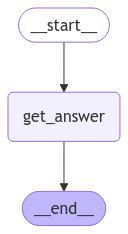

In [47]:
graph_builder = StateGraph(State)
graph_builder.add_node("get_answer", get_answer)

graph_builder.add_edge(START, "get_answer")
graph_builder.add_edge("get_answer", END)

memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)

display(Image(graph.get_graph().draw_mermaid_png()))

In [48]:
question = "How would you fit in this role?"
job_description = "We are looking for a Senior Machine Learning Engineer to join our team. The ideal candidate will have a strong background in natural language processing (NLP), large language models (LLMs), and scalable ML pipelines. You will be responsible for building and optimizing AI-driven solutions that enhance our products and services."
job_title = "Machine Learning Engineer"
company_name = "AiThon Pvt. Ltd."

In [49]:
input_state = {
    "resume": RESUME,
    "cover_letter": COVER_LETTER,
    "todays_date": get_todays_date(),
    "job_description": "",
    "job_title": "",
    "company_name": "",
    "question": question,
    "answer": "",
    "sources": ""
}
config = {"configurable": {"thread_id": "1"}}

output = graph.invoke(
    input_state,
    config=config,
)

In [50]:
print(output["answer"])

With a strong background in natural language processing (NLP), large language models (LLMs), and scalable ML pipelines, I am eager to contribute to your team by building and optimizing AI-driven solutions. I have developed LLM instruction-tuning pipelines using Dagster, AWS S3, SQS, DynamoDB, and TorchServe, and built retrieval-augmented generation (RAG) agents using LangChain and Ollama. My experience extends to optimizing LLMs with PEFT techniques like LoRA and DeepSpeed, improving both model performance and efficiency.


In [51]:
print(output["sources"])

None
